<a href="https://colab.research.google.com/github/VanKoh01/us-dba-02/blob/main/pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
pip install scikit-learn

In [65]:
import pandas as pd

In [66]:
df = pd.read_csv('final_pokemon.csv')

In [67]:
from IPython.display import Image, display

print("Primeras 5 filas:")
for index, row in df.head().iterrows(): #muestra las imagenes contenidas en la tabla sprites
    display(Image(url=eval(row['sprites'])['normal']))
    display(df.iloc[index:index+1])

Primeras 5 filas:


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height,weight,base_experience,sprites
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False,7,69,64,{'normal': 'http://img.pokemondb.net/sprites/b...


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height,weight,base_experience,sprites
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False,10,130,142,{'normal': 'http://img.pokemondb.net/sprites/b...


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height,weight,base_experience,sprites
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False,20,1000,236,{'normal': 'http://img.pokemondb.net/sprites/b...


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height,weight,base_experience,sprites
3,5,Charmander,Fire,Normal,39,52,43,60,50,65,1,False,6,85,62,{'normal': 'http://img.pokemondb.net/sprites/b...


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,height,weight,base_experience,sprites
4,6,Charmeleon,Fire,Normal,58,64,58,80,65,80,1,False,11,190,142,{'normal': 'http://img.pokemondb.net/sprites/b...


In [68]:
print("\nColumnas visibles:")
print(df.columns.tolist())


Columnas visibles:
['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'height', 'weight', 'base_experience', 'sprites']


In [69]:
# quitamos datos innecesarios, para que muestre el nombre en vez de un texto para indicar html...
cols_to_remove = [col for col in ['Name', '#', 'sprites'] if col in df.columns]
df_model = df.drop(columns=cols_to_remove)

# si es legendario =1 si no otra cosa
df_model['Legendary'] = df_model['Legendary'].astype(int)

# variables dummy para este fin
df_model = pd.get_dummies(df_model, drop_first=True)

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

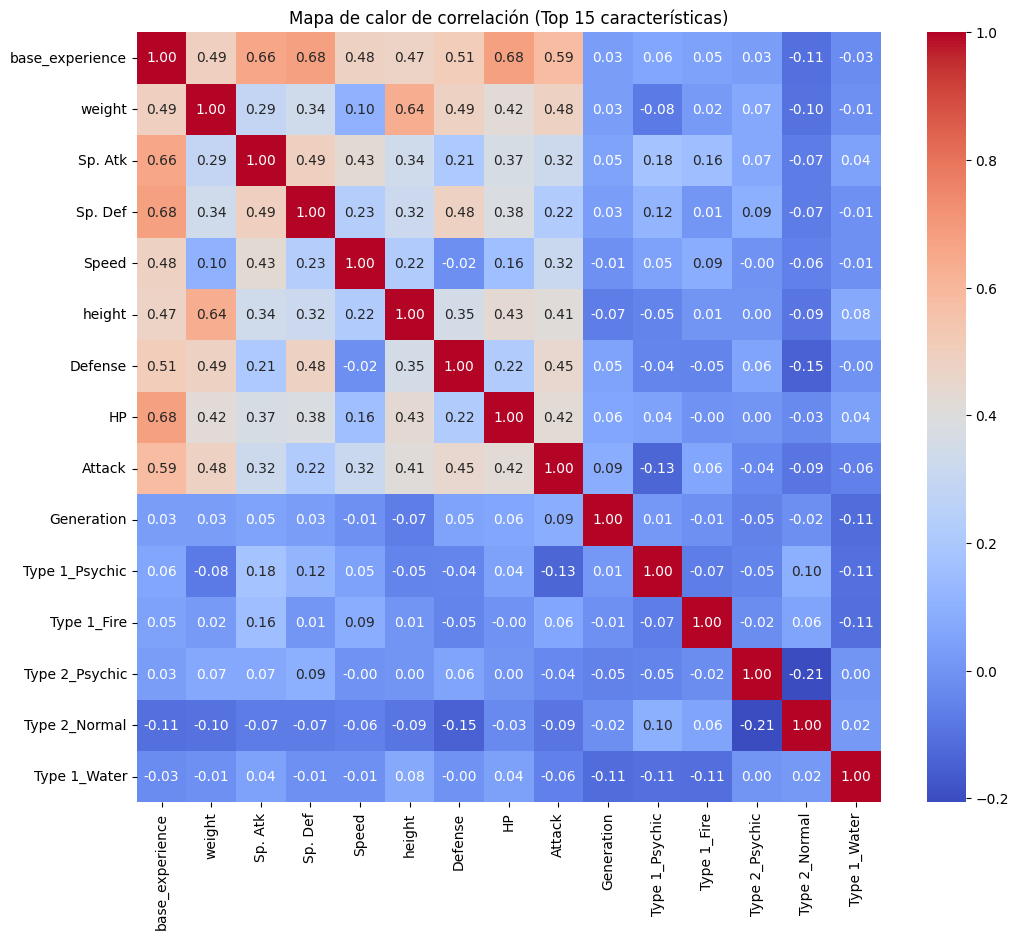

In [71]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Define X & y
X = df_model.drop(columns=['Legendary'])
y = df_model['Legendary']

# dividimos datos para entrenar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# entrenamos un random forest alassifier para separar lo mas importante
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]
top_n = 15
top_features = feature_names[indices][:top_n]

# reducimos a 15 para no desbordar
top_corr_features = df_model[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_features, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Mapa de calor de correlación (Top 15 características)")
plt.show()

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
X = df_model.drop(columns=['Legendary'])
y = df_model['Legendary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #la prueba sera en 0.3
print("\n--- Regresión Lineal (como clasificador) ---")
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Modelo de Regresión Lineal entrenado.") #devuelve mensaje de entrenamiento, llegue a pensar que no avanzaba


--- Regresión Lineal (como clasificador) ---
Modelo de Regresión Lineal entrenado.


In [73]:
y_pred_lr_class = (y_pred_lr >= 0.5).astype(int)
print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_lr_class))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_lr_class))


Matriz de confusión:
[[202   0]
 [  7   1]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       202
           1       1.00      0.12      0.22         8

    accuracy                           0.97       210
   macro avg       0.98      0.56      0.60       210
weighted avg       0.97      0.97      0.95       210



In [74]:
print("\n--- Árbol de Decisión ---")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_dt))


--- Árbol de Decisión ---
Matriz de confusión:
[[202   0]
 [  0   8]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       202
           1       1.00      1.00      1.00         8

    accuracy                           1.00       210
   macro avg       1.00      1.00      1.00       210
weighted avg       1.00      1.00      1.00       210



In [75]:
print("\n--- Random Forest ---")
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Matriz de confusión:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred_rf))



--- Random Forest ---
Matriz de confusión:
[[202   0]
 [  2   6]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       202
           1       1.00      0.75      0.86         8

    accuracy                           0.99       210
   macro avg       1.00      0.88      0.93       210
weighted avg       0.99      0.99      0.99       210



In [76]:
import numpy as np
importances = rf.feature_importances_
feature_names = X.columns

In [77]:
indices = np.argsort(importances)[::-1]

In [78]:
top_n = 15
top_features = feature_names[indices][:top_n]
top_importances = importances[indices][:top_n]

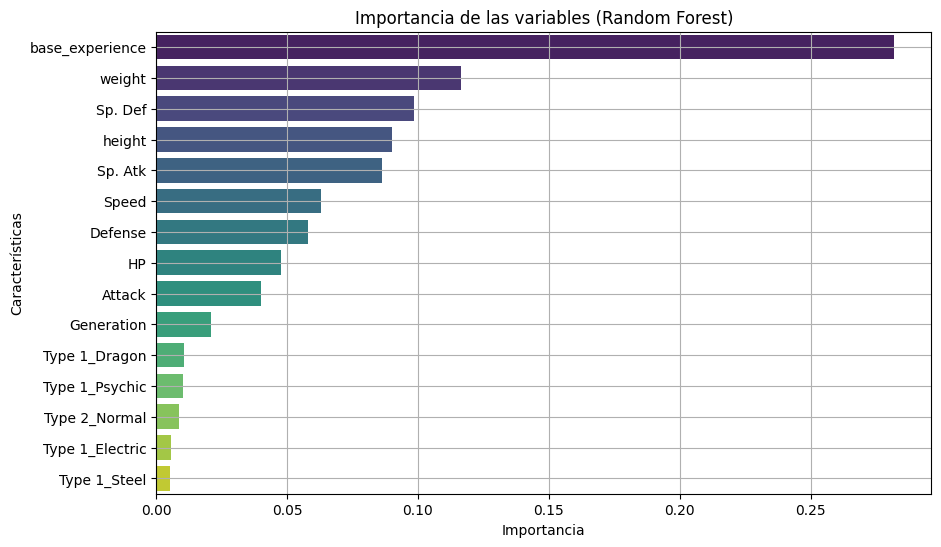

In [79]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features, hue=top_features, palette="viridis", legend=False)
plt.title("Importancia de las variables (Random Forest)")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.grid(True)
plt.show()